#### 드문 특성과 가짜 상관관계

**MNIST에 백색 잡음 픽셀과 0 픽셀을 추가하기**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
train_images_with_noise_channels.shape

(60000, 1568)

**백색 잡음과 0을 추가한 MNIST 데이터에서 모델 훈련하기**

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 9s 23ms/step - loss: 0.6197 - accuracy: 0.8126 - val_loss: 0.3301 - val_accuracy: 0.8978
Epoch 2/10
375/375 [==============================] - 11s 30ms/step - loss: 0.2544 - accuracy: 0.9207 - val_loss: 0.1835 - val_accuracy: 0.9448
Epoch 3/10
375/375 [==============================] - 6s 16ms/step - loss: 0.1647 - accuracy: 0.9488 - val_loss: 0.1432 - val_accuracy: 0.9578
Epoch 4/10
375/375 [==============================] - 6s 16ms/step - loss: 0.1166 - accuracy: 0.9633 - val_loss: 0.1345 - val_accuracy: 0.9602
Epoch 5/10
375/375 [==============================] - 6s 16ms/step - loss: 0.0850 - accuracy: 0.9728 - val_loss: 0.1748 - val_accuracy: 0.9489
Epoch 6/10
375/375 [==============================] - 6s 16ms/step - loss: 0.0633 - accuracy: 0.9796 - val_loss: 0.1384 - val_accuracy: 0.9615
Epoch 7/10
375/375 [==============================] - 6s 16ms/step - loss: 0.0481 - accuracy: 0.9849 - val_loss: 0.1348 - val_accuracy: 0.963

**검증 정확도 비교 그래프 그리기**

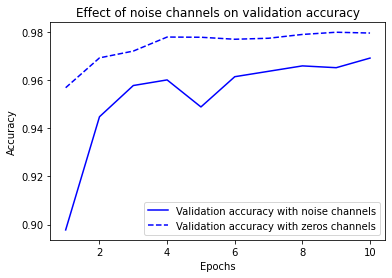

In [4]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### 딥러닝에서 일반화의 본질

**랜덤하게 섞은 레이블로 MNIST 모델 훈련하기**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 6s 14ms/step - loss: 2.3169 - accuracy: 0.1026 - val_loss: 2.3052 - val_accuracy: 0.1076
Epoch 2/100
375/375 [==============================] - 6s 17ms/step - loss: 2.3004 - accuracy: 0.1175 - val_loss: 2.3106 - val_accuracy: 0.1046
Epoch 3/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2912 - accuracy: 0.1263 - val_loss: 2.3156 - val_accuracy: 0.1038
Epoch 4/100
375/375 [==============================] - 3s 9ms/step - loss: 2.2769 - accuracy: 0.1399 - val_loss: 2.3244 - val_accuracy: 0.1030
Epoch 5/100
375/375 [==============================] - 3s 9ms/step - loss: 2.2598 - accuracy: 0.1514 - val_loss: 2.3345 - val_accuracy: 0.1041
Epoch 6/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2376 - accuracy: 0.1693 - val_loss: 2.3422 - val_accuracy: 0.1045
Epoch 7/100
375/375 [==============================] - 5s 13ms/step - loss: 2.2133 - accuracy: 0.1851 - val_loss: 2.3575 - val_accuracy: 0

## 훈련 성능 향상하기

### 경사 하강법의 핵심 파라미터 튜닝하기

**잘못된 높은 학습률로 MNIST 모델 훈련하기**

In [6]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 10ms/step - loss: 1122.3434 - accuracy: 0.4156 - val_loss: 3.4441 - val_accuracy: 0.3455
Epoch 2/10
375/375 [==============================] - 3s 9ms/step - loss: 4.3359 - accuracy: 0.2783 - val_loss: 2.1941 - val_accuracy: 0.2344
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 3.5147 - accuracy: 0.2539 - val_loss: 2.9847 - val_accuracy: 0.2403
Epoch 4/10
375/375 [==============================] - 3s 9ms/step - loss: 2.8229 - accuracy: 0.2635 - val_loss: 2.1593 - val_accuracy: 0.2688
Epoch 5/10
375/375 [==============================] - 3s 9ms/step - loss: 2.9176 - accuracy: 0.2446 - val_loss: 2.9993 - val_accuracy: 0.2630
Epoch 6/10
375/375 [==============================] - 3s 9ms/step - loss: 2.7573 - accuracy: 0.2649 - val_loss: 2.4010 - val_accuracy: 0.2028
Epoch 7/10
375/375 [==============================] - 3s 9ms/step - loss: 2.5123 - accuracy: 0.2571 - val_loss: 2.1036 - val_accuracy: 0.2867
Ep

**같은 모델을 적절한 학습률로 훈련하기**

In [7]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 10ms/step - loss: 0.3824 - accuracy: 0.9097 - val_loss: 0.1522 - val_accuracy: 0.9600
Epoch 2/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1406 - accuracy: 0.9630 - val_loss: 0.1300 - val_accuracy: 0.9716
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1089 - accuracy: 0.9739 - val_loss: 0.1806 - val_accuracy: 0.9669
Epoch 4/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1000 - accuracy: 0.9785 - val_loss: 0.1919 - val_accuracy: 0.9688
Epoch 5/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0889 - accuracy: 0.9816 - val_loss: 0.2224 - val_accuracy: 0.9707
Epoch 6/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0816 - accuracy: 0.9846 - val_loss: 0.2239 - val_accuracy: 0.9713
Epoch 7/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0692 - accuracy: 0.9871 - val_loss: 0.2231 - val_accuracy: 0.9735
Epoch

### 구조에 대해 더 나은 가정하기

### 모델 용량 늘리기

**MNIST 데이터를 사용한 간단한 로지스틱 회귀 모델**

In [8]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 3ms/step - loss: 0.6773 - accuracy: 0.8307 - val_loss: 0.3589 - val_accuracy: 0.9022
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3513 - accuracy: 0.9026 - val_loss: 0.3077 - val_accuracy: 0.9138
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3154 - accuracy: 0.9121 - val_loss: 0.2895 - val_accuracy: 0.9200
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2987 - accuracy: 0.9163 - val_loss: 0.2803 - val_accuracy: 0.9234
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2894 - accuracy: 0.9189 - val_loss: 0.2749 - val_accuracy: 0.9251
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2825 - accuracy: 0.9206 - val_loss: 0.2705 - val_accuracy: 0.9273
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2779 - accuracy: 0.9220 - val_loss: 0.2678 - val_accuracy: 0.9268
Epoch 

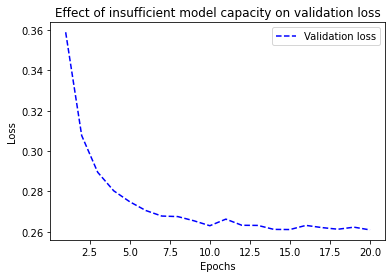

In [9]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [10]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 5ms/step - loss: 0.3540 - accuracy: 0.8983 - val_loss: 0.1790 - val_accuracy: 0.9506
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1570 - accuracy: 0.9537 - val_loss: 0.1289 - val_accuracy: 0.9621
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1108 - accuracy: 0.9663 - val_loss: 0.1089 - val_accuracy: 0.9684
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0873 - accuracy: 0.9733 - val_loss: 0.1115 - val_accuracy: 0.9663
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0701 - accuracy: 0.9794 - val_loss: 0.0944 - val_accuracy: 0.9722
Epoch 6/20
375/375 [==============================] - 2s 7ms/step - loss: 0.0571 - accuracy: 0.9825 - val_loss: 0.0876 - val_accuracy: 0.9747
Epoch 7/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0486 - accuracy: 0.9850 - val_loss: 0.0963 - val_accuracy: 0.9726
Epoch 

### 모델 규제하기

#### 네트워크 크기 축소

**원본 모델**

In [11]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17473536/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.5058 - accuracy: 0.7928 - val_loss: 0.3868 - val_accuracy: 0.8660
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3063 - accuracy: 0.8989 - val_loss: 0.3043 - val_accuracy: 0.8874
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2232 - accuracy: 0.9275 - val_loss: 0.2754 - val_accuracy: 0.8926
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1787 - accuracy: 0.9409 - val_loss: 0.2765 - val_accuracy: 0.8911
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1431 - accuracy: 0.9543 - val_loss: 0.2790 - val_accuracy: 0.8902
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1168 - accuracy: 0.9639 - val_loss: 0.3191 - val_accuracy: 0.8790
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0973 - accurac

**작은 용량의 모델**

In [12]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 36ms/step - loss: 0.5575 - accuracy: 0.7860 - val_loss: 0.4861 - val_accuracy: 0.7983
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.4031 - accuracy: 0.8805 - val_loss: 0.3799 - val_accuracy: 0.8741
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3186 - accuracy: 0.9066 - val_loss: 0.3378 - val_accuracy: 0.8772
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2621 - accuracy: 0.9193 - val_loss: 0.3047 - val_accuracy: 0.8850
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2206 - accuracy: 0.9321 - val_loss: 0.2856 - val_accuracy: 0.8901
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1896 - accuracy: 0.9426 - val_loss: 0.2749 - val_accuracy: 0.8919
Epoch 7/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1653 - accuracy: 0.9506 - val_loss: 0.2758 - val_accuracy: 0.8906
Epoch 8/20
30

**큰 용량의 모델**

In [13]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 9s 268ms/step - loss: 0.5592 - accuracy: 0.7498 - val_loss: 0.3225 - val_accuracy: 0.8777
Epoch 2/20
30/30 [==============================] - 8s 255ms/step - loss: 0.2532 - accuracy: 0.9011 - val_loss: 0.2816 - val_accuracy: 0.8859
Epoch 3/20
30/30 [==============================] - 8s 253ms/step - loss: 0.1615 - accuracy: 0.9362 - val_loss: 0.2815 - val_accuracy: 0.8871
Epoch 4/20
30/30 [==============================] - 8s 254ms/step - loss: 0.0951 - accuracy: 0.9718 - val_loss: 0.3571 - val_accuracy: 0.8877
Epoch 5/20
30/30 [==============================] - 8s 256ms/step - loss: 0.0434 - accuracy: 0.9904 - val_loss: 0.3935 - val_accuracy: 0.8712
Epoch 6/20
30/30 [==============================] - 9s 291ms/step - loss: 0.0051 - accuracy: 0.9997 - val_loss: 0.5028 - val_accuracy: 0.8896
Epoch 7/20
30/30 [==============================] - 8s 255ms/step - loss: 7.0847e-04 - accuracy: 0.9999 - val_loss: 0.6179 - val_accuracy: 0.8882
Ep

#### 가중치 규제 추가하기

**모델에 L2 가중치 추가하기**

In [14]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.6013 - accuracy: 0.7840 - val_loss: 0.4777 - val_accuracy: 0.8595
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.4044 - accuracy: 0.8919 - val_loss: 0.3905 - val_accuracy: 0.8812
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3316 - accuracy: 0.9149 - val_loss: 0.3633 - val_accuracy: 0.8860
Epoch 4/20
30/30 [==============================] - 1s 30ms/step - loss: 0.3023 - accuracy: 0.9200 - val_loss: 0.3584 - val_accuracy: 0.8884
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2767 - accuracy: 0.9321 - val_loss: 0.3681 - val_accuracy: 0.8789
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2640 - accuracy: 0.9377 - val_loss: 0.3547 - val_accuracy: 0.8875
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2543 - accuracy: 0.9382 - val_loss: 0.3592 - val_accuracy: 0.8857
Epoch 8/20
30

**케라스에서 사용할 수 있는 가중치 규제**

In [15]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### 드롭아웃 추가

**IMDB 모델에 드롭아웃 추가하기**

In [16]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 38ms/step - loss: 0.6572 - accuracy: 0.6035 - val_loss: 0.5908 - val_accuracy: 0.8176
Epoch 2/20
30/30 [==============================] - 1s 30ms/step - loss: 0.5654 - accuracy: 0.7246 - val_loss: 0.4681 - val_accuracy: 0.8655
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.4802 - accuracy: 0.7874 - val_loss: 0.3911 - val_accuracy: 0.8710
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.4110 - accuracy: 0.8367 - val_loss: 0.3390 - val_accuracy: 0.8847
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3562 - accuracy: 0.8685 - val_loss: 0.3052 - val_accuracy: 0.8869
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3083 - accuracy: 0.8921 - val_loss: 0.2864 - val_accuracy: 0.8822
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2752 - accuracy: 0.9057 - val_loss: 0.2779 - val_accuracy: 0.8897
Epoch 8/20
30